# Assignment 1

Implementare la feature Zero-crossing rate (ZCR) per la descrizione di un segnale audio monocanale. Verificare l'effetto dell'uso di ZCR in combinazione con altre feature.

## Import librerie

In [2]:
import os
import numpy as np
from time import time
from scipy.io import wavfile as wav

import matplotlib.pyplot as plt
import IPython.display as ipd

# Strumenti di classificazione
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Feature audio
import librosa
import librosa.display as lid
from sklearn.preprocessing import scale

## Data loader

In [1]:
# Segnaposto per feature extractor
def identity(input):
    return input

# Data loader
def load_data(feature_extractor=identity, normalize=True):

    labels = []
    features = []

    for f in sorted(os.listdir('recordings/')):
        if f.endswith('.wav'):
            # Carica file ed estraine le features
            _, signal = wav.read('recordings/' + f)
            cur_features = feature_extractor(signal)
            features.append(cur_features)

            # Categorie
            label = f.split('_')[0]
            labels.append(label)

    # Split dei dati in train e test
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=1)

    if normalize:
        eps = 0.001
        X_train = np.array(X_train)
        X_train_mean = X_train.mean(axis=0)
        X_train_std = X_train.std(axis=0)
        X_train = (X_train - X_train_mean + eps)/(X_train_std + eps)
        X_train = [row for row in X_train]

        X_test = [row for row in (np.array(X_test) - X_train_mean + eps)/(X_train_std + eps)]

    return X_train, X_test, y_train, y_test

## Features

In [3]:
def crop(input, size=100):
    # Elimina eventuali valori oltre il numero consentito
    output = input[0:min(size, input.shape[0])]
    # Aggiungi valori nulli per raggiungere la dimensione richiesta
    output = np.concatenate((output, np.zeros(size-output.shape[0])))
    return output

In [4]:
def sdev(input):
    return np.std(input, keepdims=True)

In [5]:
def aavg(input):
    return np.mean(np.abs(input), keepdims=True)

In [6]:
def duration(input):
    return input.shape

In [7]:
def energy(input):
    return np.sum((input*1.0)**2, keepdims=True)

In [8]:
def zcr(input):
    if(np.sign(input[0]) == np.sign(input[-1])):
        return np.sum(np.abs(np.sign(input) - np.sign(np.roll(input, -1))), keepdims=True)/2
    else:
        return np.sum(np.abs(np.sign(input) - np.sign(np.roll(input, -1))), keepdims=True)/2 - 1 

La **Zero-Crossing Rate** conta il numero di volte in cui il segnale attraversa lo zero.

In [9]:
def combo(input):
    return np.concatenate((aavg(input),sdev(input),duration(input),energy(input), zcr(input)))

## Addestramento modello con singole funzioni
### aavg, sdev, duration, energy,  zcr

----------------------------------------------------------------------
Addestramento SVC con dati generati tramite la funzione aavg
Addestramento completato in 3.073s
Addestramento completato in 3.620s
Migliore combinazione di parametri:
 C: 1000.0
 gamma: 1.0
Report di classificazione:
              precision    recall  f1-score   support

           0       0.38      0.18      0.24        17
           1       0.00      0.00      0.00        10
           2       0.20      0.20      0.20        15
           3       0.17      0.05      0.08        19
           4       0.10      0.27      0.14        11
           5       0.12      0.14      0.13        14
           6       0.17      0.29      0.22        14
           7       0.00      0.00      0.00        19
           8       0.11      0.12      0.11        17
           9       0.16      0.36      0.22        14

    accuracy                           0.15       150
   macro avg       0.14      0.16      0.13       150
weighted

/Users/dario/opt/anaconda3/envs/dsim/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------------------------------------------------------------
Addestramento SVC con dati generati tramite la funzione sdev
Addestramento completato in 3.268s
Addestramento completato in 3.560s
Migliore combinazione di parametri:
 C: 500.0
 gamma: 1.0
Report di classificazione:
              precision    recall  f1-score   support

           0       0.20      0.12      0.15        17
           1       0.20      0.20      0.20        10
           2       0.13      0.20      0.16        15
           3       0.21      0.16      0.18        19
           4       0.09      0.27      0.13        11
           5       0.14      0.21      0.17        14
           6       0.27      0.21      0.24        14
           7       0.00      0.00      0.00        19
           8       0.00      0.00      0.00        17
           9       0.16      0.29      0.21        14

    accuracy                           0.15       150
   macro avg       0.14      0.17      0.14       150
weighted 

/Users/dario/opt/anaconda3/envs/dsim/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Addestramento completato in 4.064s
Addestramento completato in 3.433s
Migliore combinazione di parametri:
 C: 1000.0
 gamma: 1.0
Report di classificazione:
              precision    recall  f1-score   support

           0       0.25      0.06      0.10        17
           1       0.21      0.30      0.25        10
           2       0.16      0.20      0.18        15
           3       0.31      0.42      0.36        19
           4       0.30      0.27      0.29        11
           5       0.00      0.00      0.00        14
           6       0.67      0.14      0.24        14
           7       0.00      0.00      0.00        19
           8       0.29      0.65      0.40        17
           9       0.17      0.43      0.24        14

    accuracy                           0.25       150
   macro avg       0.24      0.25      0.20       150
weighted avg       0.23      0.25      0.20       150

Matrice di confusione:
[[ 1  0  0  2  2  0  0  0  4  8]
 [ 0  3  2  2  1  0  0  0  1 

/Users/dario/opt/anaconda3/envs/dsim/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Addestramento completato in 2.348s
Addestramento completato in 2.384s
Migliore combinazione di parametri:
 C: 500.0
 gamma: 0.1
Report di classificazione:
              precision    recall  f1-score   support

           0       1.00      0.06      0.11        17
           1       0.00      0.00      0.00        10
           2       0.20      0.07      0.10        15
           3       0.18      0.58      0.28        19
           4       0.12      0.27      0.17        11
           5       0.11      0.14      0.12        14
           6       0.36      0.29      0.32        14
           7       0.13      0.21      0.16        19
           8       0.00      0.00      0.00        17
           9       0.00      0.00      0.00        14

    accuracy                           0.17       150
   macro avg       0.21      0.16      0.13       150
weighted avg       0.23      0.17      0.13       150

Matrice di confusione:
[[ 1  0  0  9  0  2  2  3  0  0]
 [ 0  0  1  5  4  0  0  0  0  

/Users/dario/opt/anaconda3/envs/dsim/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------------------------------------------------------------
Addestramento SVC con dati generati tramite la funzione zcr
Addestramento completato in 2.651s
Addestramento completato in 2.860s
Migliore combinazione di parametri:
 C: 100.0
 gamma: 0.5
Report di classificazione:
              precision    recall  f1-score   support

           0       0.23      0.53      0.32        17
           1       0.20      0.90      0.33        10
           2       0.27      0.40      0.32        15
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00        14
           6       0.75      0.64      0.69        14
           7       0.25      0.05      0.09        19
           8       0.22      0.12      0.15        17
           9       0.28      0.36      0.31        14

    accuracy                           0.27       150
   macro avg       0.22      0.30      0.22       150
weighted a

/Users/dario/opt/anaconda3/envs/dsim/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


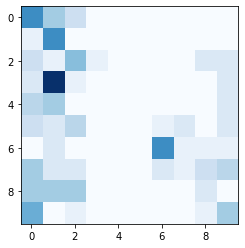

In [10]:
for i in ["aavg", "sdev", "duration", "energy", "zcr"]:
    # Caricamento dati
    X_train, X_test, y_train, y_test = load_data(feature_extractor = eval(i))
    # Parametri da provare in cross validation
    param_grid = {'C': [1e2, 5e2, 1e3],
                  'gamma': [0.005, 0.01, 0.1, 0.5, 1.0], }
    
    # Inizializzazione Support Vector Machine
    clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=2)
    
    print("----------------------------------------------------------------------")
    print("Addestramento SVC con dati generati tramite la funzione " + i)
    # Addestramento
    t0 = time()
    clf = clf.fit(X_train, y_train)
    print("Addestramento completato in %0.3fs" % (time() - t0))
    # Parametri da provare in cross validation
    param_grid = {'C': [1e2, 5e2, 1e3],
                  'gamma': [0.005, 0.01, 0.1, 0.5, 1.0], }


    # Inizializzazione Support Vector Machine
    clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=2)
    
    # Addestramento
    t0 = time()
    clf = clf.fit(X_train, y_train)
    print("Addestramento completato in %0.3fs" % (time() - t0))
    # Risultato della cross validation per la selezione dei parametri
    print("Migliore combinazione di parametri:")
    print(" C: "+str(clf.best_estimator_.C))
    print(" gamma: "+str(clf.best_estimator_.gamma))
    
    # Test
    y_pred = clf.predict(X_test)
    
    # Report di classificazione
    print("Report di classificazione:")
    print(classification_report(y_test, y_pred))
    
    # Matrice di confusione
    print("Matrice di confusione:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    plt.imshow(cm, cmap=plt.cm.Blues)
    

Se il segnale viene rappresentato con un'unica feature il classificatore ottiene pessimi risultati. L'accuracy più alta, pari a 0.27, è raggiunta utilizzando lo Zero-crossing rate.

## Addestramento modello con funzione combo

Feature utilizzate: aavg, sdev, duration, energy e zcr

In [14]:
# Caricamento dati
X_train, X_test, y_train, y_test = load_data(feature_extractor=combo)

In [15]:
# Numero di esempi di training
len(X_train)

1350

In [16]:
# Cardinalità delle features di training
X_train[0].shape

(5,)

In [17]:
# Parametri da provare in cross validation
param_grid = {'C': [1e2, 5e2, 1e3],
          'gamma': [0.005, 0.01, 0.1, 0.5, 1.0], }

# Inizializzazione Support Vector Machine
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=2)

# Addestramento
t0 = time()
clf = clf.fit(X_train, y_train)
print("Addestramento completato in %0.3fs" % (time() - t0))

Addestramento completato in 1.961s


In [18]:
# Risultato della cross validation per la selezione dei parametri
print("Migliore combinazione di parametri:")
print(" C: "+str(clf.best_estimator_.C))
print(" gamma: "+str(clf.best_estimator_.gamma))

Migliore combinazione di parametri:
 C: 100.0
 gamma: 0.5


### Test modello combo

Report di classificazione:
              precision    recall  f1-score   support

           0       0.77      0.59      0.67        17
           1       0.47      0.80      0.59        10
           2       0.64      0.60      0.62        15
           3       0.85      0.58      0.69        19
           4       0.44      0.64      0.52        11
           5       0.50      0.71      0.59        14
           6       0.93      0.93      0.93        14
           7       0.78      0.37      0.50        19
           8       0.53      0.53      0.53        17
           9       0.59      0.71      0.65        14

    accuracy                           0.63       150
   macro avg       0.65      0.65      0.63       150
weighted avg       0.67      0.63      0.63       150

Matrice di confusione:
[[10  0  1  0  0  0  0  0  0  6]
 [ 0  8  0  0  2  0  0  0  0  0]
 [ 0  1  9  1  0  2  1  0  1  0]
 [ 0  3  2 11  0  3  0  0  0  0]
 [ 0  2  1  0  7  1  0  0  0  0]
 [ 0  0  0  0  3 10  0  1 

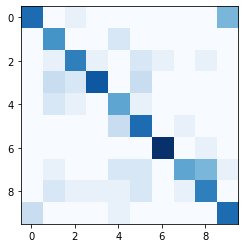

In [19]:
# Test
y_pred = clf.predict(X_test)

# Report di classificazione
print("Report di classificazione:")
print(classification_report(y_test, y_pred))

# Matrice di confusione
print("Matrice di confusione:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.imshow(cm, cmap=plt.cm.Blues)

Come è possibile osservare combinando le diverse feature il classificato riesce a raggiungere risultati discreti. L'accuracy, infatti, è pari a 0.63.